In [16]:
import pandas as pd
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import re

# Download the 'punkt' resource for tokenization
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the Twitter data from CSV
data = pd.read_csv("/content/drive/MyDrive/CSV/Twitter_Data.csv")

# Fill NaN values in the 'clean_text' column with an empty string
data["clean_text"].fillna("", inplace=True)

# Define the preprocessing function (similar to previous code)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = word_tokenize(text)  # Use word_tokenize for tokenization
    stop_words = set(stopwords.words("english"))
    ps = PorterStemmer()
    meaningful_words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(meaningful_words)  # Join the list of words into a single string


In [7]:
data

,clean_text,category,processed_text
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,crore paid neerav modi recov congress leader h...
162976,dear rss terrorist payal gawar what about modi...,-1.0,dear rss terrorist payal gawar modi kill plu m...
162977,did you cover her interaction forum where she ...,0.0,cover interact forum left
162978,there big project came into india modi dream p...,0.0,big project came india modi dream project happ...


In [8]:
# Check the dimensions of the dataset (number of rows and columns)
print("Data Shape:", data.shape)

Data Shape: (162980, 3)


In [9]:
 #Check the data types of each column
print("Data Types:")
print(data.dtypes)

Data Types:
clean_text         object
category          float64
processed_text     object
dtype: object


In [10]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

clean_text        0
category          7
processed_text    0
dtype: int64


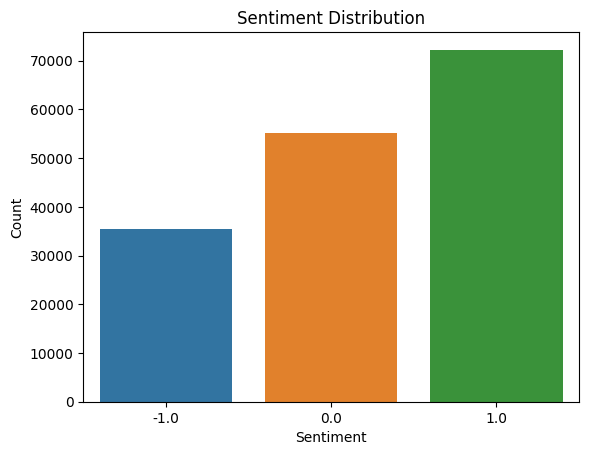

In [13]:
# Check the distribution of sentiments
sns.countplot(x="category", data=data)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

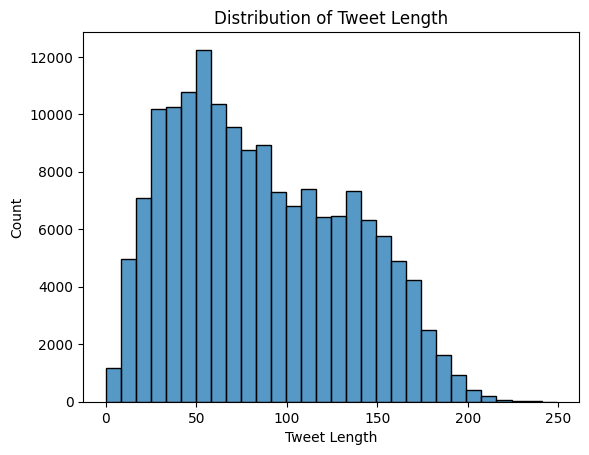

In [14]:
# Tweet Length Distribution - Histogram
data["tweet_length"] = data["processed_text"].apply(len)
sns.histplot(data["tweet_length"], bins=30)
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()

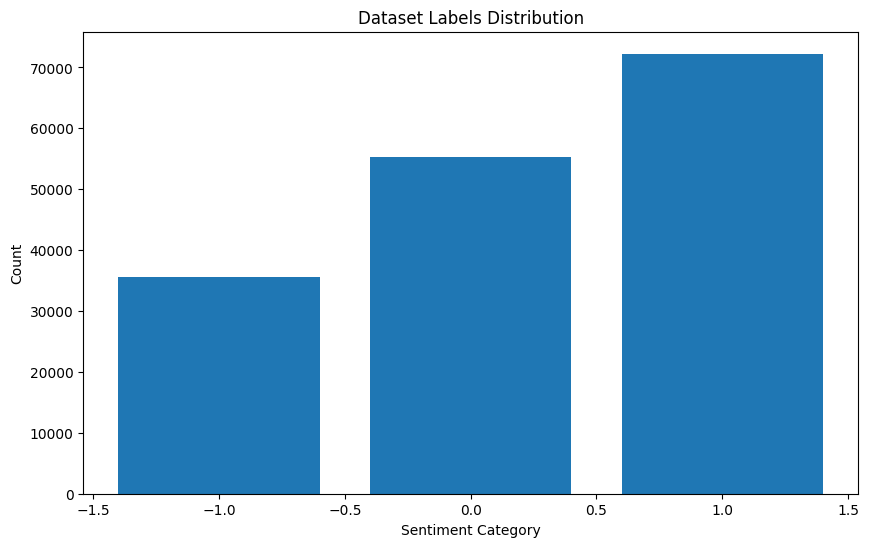

In [17]:
# Count the occurrences of each unique value in the "category" column
category_cnt = Counter(data["category"])

# Create a bar plot to visualize the distribution of labels
plt.figure(figsize=(10, 6))
plt.bar(category_cnt.keys(), category_cnt.values())
plt.title("Dataset Labels Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

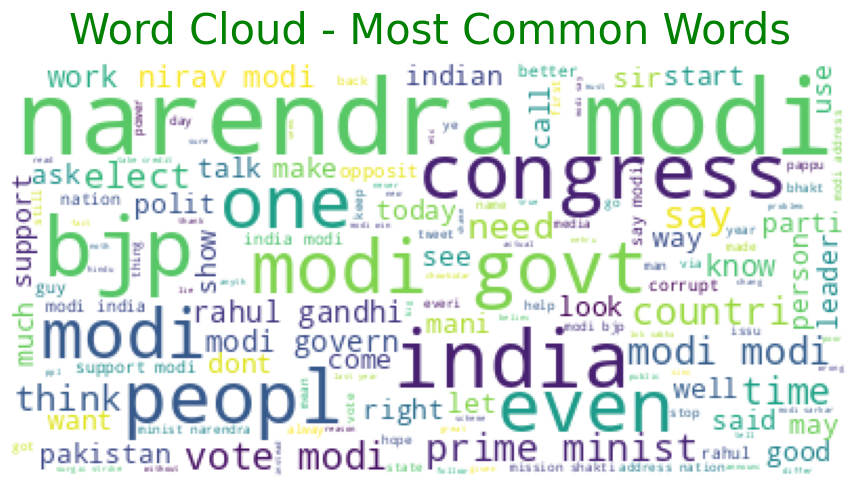

In [6]:
# Apply text preprocessing to the 'clean_text' column and create 'processed_text'
data["processed_text"] = data["clean_text"].apply(preprocess_text)

# Combine the preprocessed text into a single text string
text_corpus = " ".join(data["processed_text"])

# Define the function to create a word cloud for the most common words
def plot_wordcloud(text, title, title_size, figure_size=(24.0, 16.0), mask=None, image_color=False):
    """ A function for creating wordcloud images """
    if not text.strip():  # Check if the text is empty
        print("No words found to create the Word Cloud.")
        return

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),  # Use predefined STOPWORDS
        max_words=140,
        max_font_size=120,
        random_state=42,
        mask=mask,
    ).generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()

# Create a Word Cloud for the most common words in the text corpus
plot_wordcloud(text_corpus, "Word Cloud - Most Common Words", 30, figure_size=(10, 5))

plt.show()
